# Assignment #5 - Deep Learning


## Varsha Maurya

# I. Overview

In this assignment we are going to implement deep network like Feed Forward(FF), Deep Feed Forward(DFF) and Recurrent Neural Network(RNN). Implementation of these networks will be done on different suitable datasets. We will also examine the accuracy obtained by each implemention and understand difference between the networks. The goal of this assignment is to successfully implement Feed Forward(FF), Deep Feed Forward(DFF) and Recurrent Neural Network(RNN) on dataset so as to find the respective accuracies. In addition to this, we have also implemented LSTM on Air Quality dataset.

# II. Data

The data being used for Feed Forward Neural network(FF) and Deep Feed Forward Neural Network(DFF) consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28×28 grayscale image.

### Pre-processing, plots, understanding and observation of the data

In [108]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

In [109]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [110]:
from keras.utils import to_categorical

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

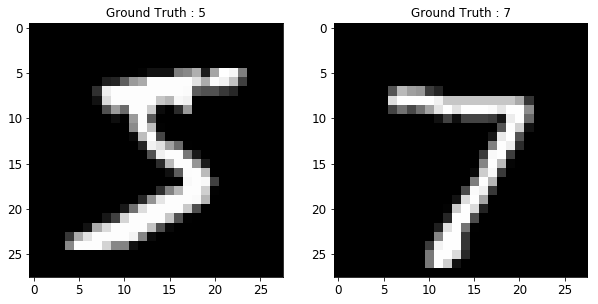

In [111]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

The images are grayscale and the pixel values range from 0 to 255. We will apply the following preprocessing to the data before feeding it to the network.

- Convert each image matrix ( 28×28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.
- Convert the data to float and scale the values between 0 to 1.
- Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer.

In [112]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


On observation, we can clearly see that images in data set are not uniform and vary in quality and clarity. Prediction of such images would not be so accurate using a linear model.

# III. Methods

### 1. Feed Forward network(FF)

In Feedforward, information only travels forward in the neural network, through the input nodes then through the hidden layers (single or many layers) and finally through the output nodes. In MLN there are no feedback connections such that the output of the network is fed back into itself. These networks are represented by a combination of many simpler models(sigmoid neurons).

<img src="https://www.learnopencv.com/wp-content/uploads/2017/10/mlp-diagram.jpg" width=500/>


Feed-forward networks have the following characteristics:
- Perceptrons are arranged in layers, with the first layer taking in inputs and the last layer producing outputs. The middle layers have no connection with the external world, and hence are called hidden layers.
- Each perceptron in one layer is connected to every perceptron on the next layer. Hence information is constantly "fed forward" from one layer to the next., and this explains why these networks are called feed-forward networks.
- There is no connection among perceptrons in the same layer.

### 2. Deep Feed Forward(DFF)

Deep feedforward networks, or multilayer perceptrons(MLPs), are the quintessential deep learning models. The goal of a feedforward network is to approximate some function $f∗$. 
For example,for a classiﬁer, $y=f∗(x)$ maps an input x to a category y. 

A feedforward network deﬁnes a mapping $y=f(x;θ)$ and learns the value of the parameters $θ$ that result in the best function approximation.

Deep Feedforward neural network model is associated with a directed acyclic graph describing how the functions are composed together. 
For example, we might have three functions $f(1)$, $f(2)$, and $f(3)$ connectedin a chain, to form $f(x) =f(3)(f(2)(f(1)(x)))$.
These chain structures are the most commonly used structures of neural networks. 
In this case, $f(1)$ is called the ﬁrst layer of the network, $f(2)$ is called the second layer, and so on. The overall length of the chain gives the depthof the model. The ﬁnal layer of a feedforward network is called the output layer. 
During neural network training, we drive $f(x)$ to match $f∗(x).$ The training data provides us with noisy, approximate examples of $f ∗(x)$ evaluated at diﬀerent training points. 
Each example $x$ is accompanied by a label $y ≈ f∗(x).$ The training examples specify directly what the output layer must do at each point x; it must produce a value that is close to y. 
The behavior of the other layers is not directly speciﬁed by the training data. The learning algorithm must decide how to use those layers to produce the desired output, but the training data do not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of $f∗$.

**Difference between Feed Forward and Deep Feed Forward neural network?**

Characteristics of Feedforward networks:
- All nodes are fully connected
- Activation flows from input layer to output, without back loops
- There is one layer between input and output (hidden layer). In most cases this type of networks is trained using Backpropagation method.

![FF](img/FF.png)

Deep Feed Forward Neural Networks are just Feed Forward NN with more than one hidden layer. Need of DFF arised because when training a traditional FF, we pass only a small amount of error to previous layer. Because of that stacking more layers led to exponential growth of training times, making DFFs quite impractical. New approaches were developed that allowed to train DFFs effectively and now they form a core of modern Machine Learning systems, covering the same purposes as FFs, but with much better results.

![DFF](img/DFF.png)



### 3. Recurrent Neural Network(RNN)

Recuurent Neural Networks make use of sequential information. If you want to predict the next word in a sentence you better know which words came before it. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations. Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far

The RNN can be modeled as recursive connection on each neuron or on entire layer in the following figures.

Single Recurrent Neuron
$$y_{(t)} = h( W_x^T x_{(t)} + W_y^T y_{(t-1)} + b)$$


Let us generalize the notation here for convenience. The layer of a neural network here can be defined a function $f$.The output $y_{(2)}$ is obtained:
$$
  y_{(2)} = f_w(y_{(1)}, x_{(2)})
$$  
where $w$ is the neural network weights. 

If we unfold the equation, 


$$/y_{(2)} = f_w(y_{(1)}, x_{(2)} )$$
$$= f_w(f_w(y_{(0)}, x_{(1)}), x_{(2)} ) = g( x_{(1)}, x_{(2)})$$
$$= f_w(f_w(x_{(0)}), x_{(2)} ) = g( x_{(0)}, x_{(1)}, x_{(2)}).$$


In general, 
$$
  y_{(t)} = f_w(y_{(t-1)}, x_{(t)} ). 
$$

- RNNs are suitable for dealing with sequential format data since they have "recurrent" structure
- To put it differently, they keep the "memory" of earlier inputs in the sequence

<img src= "http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" width=500/>

 In the above figure $x_t$ is the input at time step t. 
For example, $x_1$ could be a one-hot vector corresponding to the second word of a sentence.
- $s_t$ is the hidden state at time step t. It’s the “memory” of the network. $s_t$ is calculated based on the previous hidden state and the input at the current step: $$s_t=f(Ux_t + Ws_{t-1}).$$ The function f usually is a nonlinearity such as tanh or ReLU.  $s_{-1}$, which is required to calculate the first hidden state, is typically initialized to all zeroes.
- $o_t$ is the output at step t. For example, if we wanted to predict the next word in a sentence it would be a vector of probabilities across our vocabulary. 
$$o_t = \mathrm{softmax}(Vs_t).$$

### Implementation of Feed Forward network

In [113]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(nClasses, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [114]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3104 - acc: 0.9110 - val_loss: 0.1660 - val_acc: 0.9522
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1303 - acc: 0.9619 - val_loss: 0.1129 - val_acc: 0.9654
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0860 - acc: 0.9742 - val_loss: 0.0884 - val_acc: 0.9730
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0623 - acc: 0.9817 - val_loss: 0.0814 - val_acc: 0.9758
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0476 - acc: 0.9862 - val_loss: 0.0726 - val_acc: 0.9780
Epoch 6/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0370 - acc: 0.9894 - val_loss: 0.0751 - val_acc: 0.9774
Epoch 7/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0287 - acc: 0.9918 - val_loss: 0.0797 - val_acc

In [115]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 31us/step
Evaluation result on Test Data : Loss = 0.08449126068302121, accuracy = 0.982


Text(0.5, 1.0, 'Loss Curves')

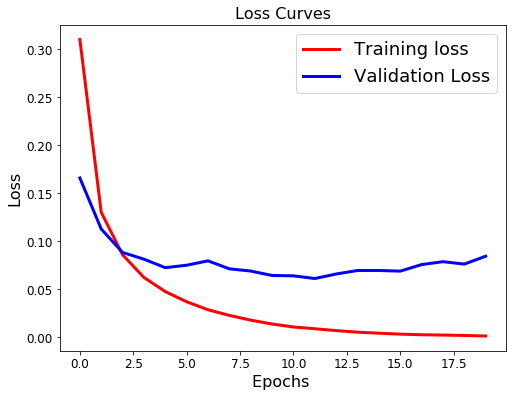

In [116]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

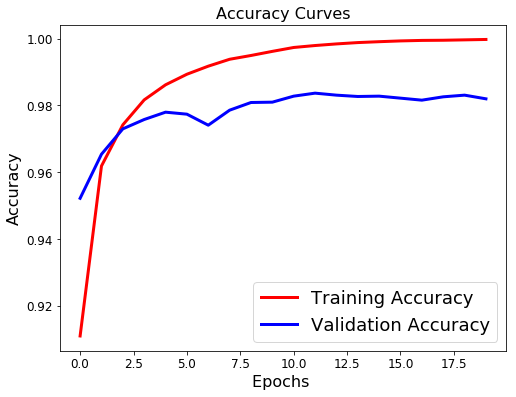

In [117]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [118]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [119]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3764 - acc: 0.8839 - val_loss: 0.1433 - val_acc: 0.9557
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1701 - acc: 0.9493 - val_loss: 0.1124 - val_acc: 0.9631
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1282 - acc: 0.9617 - val_loss: 0.0940 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1113 - acc: 0.9664 - val_loss: 0.0831 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0988 - acc: 0.9712 - val_loss: 0.0819 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0880 - acc: 0.9733 - val_loss: 0.0754 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0778 - acc: 0.9765 - val_loss: 0.0758 - val_acc

### Plotting results

Text(0.5, 1.0, 'Loss Curves')

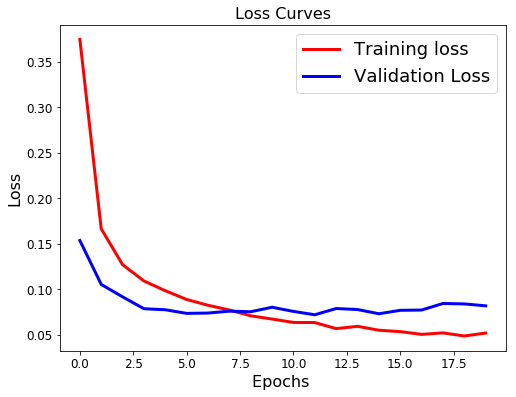

In [106]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

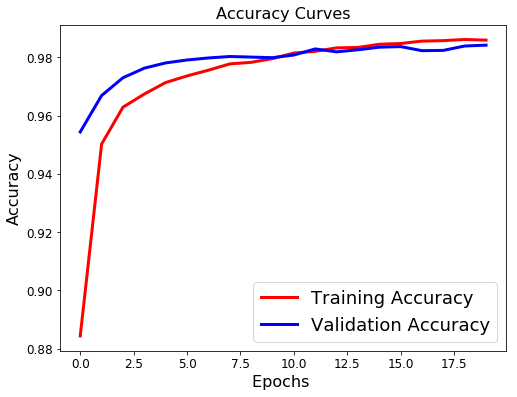

In [107]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Result

In [26]:
# Predict the most likely class
model_reg.predict_classes(test_data[[0],:])

array([7])

In [27]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[5.6086000e-21, 6.6069277e-15, 1.9677467e-12, 1.6488267e-13,
        7.8625294e-20, 9.2281844e-17, 3.6043542e-30, 1.0000000e+00,
        2.7454575e-17, 8.5124893e-12]], dtype=float32)

## Implementation of Deep Feed Forward

In [33]:
from keras.models import Sequential
from keras.layers import Dense
 
modelDFF = Sequential()
modelDFF.add(Dense(1000, activation='relu', input_shape=(dimData,)))
modelDFF.add(Dense(1000, activation='relu'))
modelDFF.add(Dense(nClasses, activation='softmax'))
modelDFF.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
historyDFF = modelDFF.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2539 - acc: 0.9210 - val_loss: 0.1241 - val_acc: 0.9602
Epoch 2/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0811 - acc: 0.9750 - val_loss: 0.0729 - val_acc: 0.9772
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0511 - acc: 0.9839 - val_loss: 0.0656 - val_acc: 0.9810
Epoch 4/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0359 - acc: 0.9887 - val_loss: 0.0665 - val_acc: 0.9806
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0260 - acc: 0.9918 - val_loss: 0.1044 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0906 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0168 - acc: 0.9946 - val_loss: 0.0963 - va

In [35]:
[test_loss, test_acc] = modelDFF.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 63us/step
Evaluation result on Test Data : Loss = 0.135980320777402, accuracy = 0.9819


Text(0.5, 1.0, 'Loss Curves')

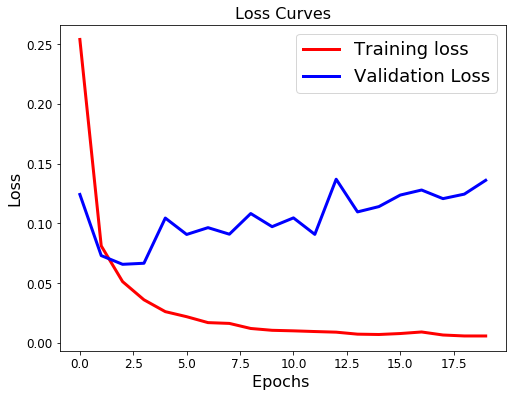

In [37]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(historyDFF.history['loss'],'r',linewidth=3.0)
plt.plot(historyDFF.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

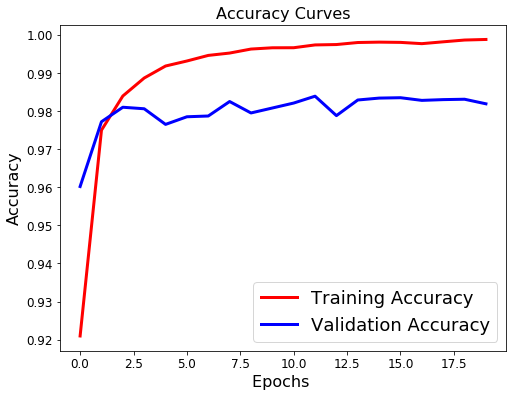

In [38]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(historyDFF.history['acc'],'r',linewidth=3.0)
plt.plot(historyDFF.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [39]:
from keras.layers import Dropout
 
modelDFF_reg = Sequential()
modelDFF_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
modelDFF_reg.add(Dropout(0.5))
modelDFF_reg.add(Dense(512, activation='relu'))
modelDFF_reg.add(Dropout(0.5))
modelDFF_reg.add(Dense(nClasses, activation='softmax'))

In [40]:
modelDFF_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
historyDFF_reg = modelDFF_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.3722 - acc: 0.8860 - val_loss: 0.1347 - val_acc: 0.9580
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.1672 - acc: 0.9496 - val_loss: 0.1080 - val_acc: 0.9646
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1315 - acc: 0.9610 - val_loss: 0.0836 - val_acc: 0.9749
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1077 - acc: 0.9679 - val_loss: 0.0820 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0973 - acc: 0.9713 - val_loss: 0.0744 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0884 - acc: 0.9734 - val_loss: 0.0781 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0825 - acc: 0.9753 - val_loss: 0.0733 - val_acc

### Plots for Result

Text(0.5, 1.0, 'Loss Curves')

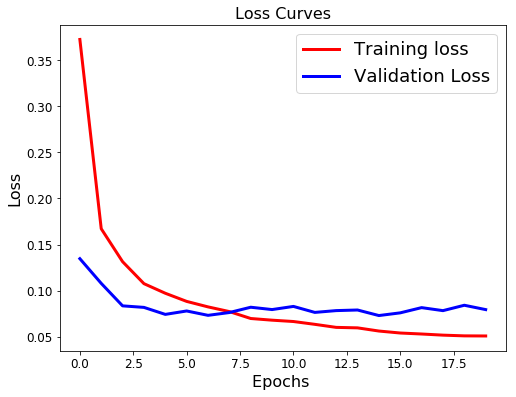

In [42]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(historyDFF_reg.history['loss'],'r',linewidth=3.0)
plt.plot(historyDFF_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

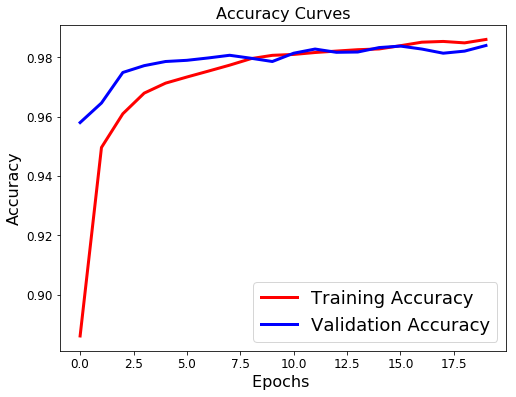

In [43]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(historyDFF_reg.history['acc'],'r',linewidth=3.0)
plt.plot(historyDFF_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Results

In [44]:
# Predict the most likely class
modelDFF_reg.predict_classes(test_data[[0],:])

array([7])

In [45]:
# Predict the probabilities for each class 
modelDFF_reg.predict(test_data[[0],:])

array([[1.0185416e-22, 8.2341264e-16, 1.5496407e-14, 2.7234223e-13,
        3.0477845e-21, 9.1398238e-18, 8.7327710e-32, 1.0000000e+00,
        1.7705164e-20, 1.4626761e-12]], dtype=float32)

### Implementing Recurrent Neural Network

In [83]:
import numpy as np
from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

In [84]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [85]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

In [86]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

In [87]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [88]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

In [89]:
y_train = y_data[:1395]
y_test = y_data[1395:]

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


In [91]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [92]:
def simple_rnn():
    modelRNN = Sequential()
    modelRNN.add(SimpleRNN(50, input_shape = (49,1), return_sequences = False))
    modelRNN.add(Dense(46))
    modelRNN.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    modelRNN.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return modelRNN

In [93]:
modelRNN = KerasClassifier(build_fn = simple_rnn, epochs = 200, batch_size = 50, verbose = 1)

In [94]:
hist = modelRNN.fit(X_train, y_train)

Epoch 1/200
1395/1395 [==============================] - 1s 802us/step - loss: 3.3691 - acc: 0.3305
Epoch 2/200
1395/1395 [==============================] - 0s 240us/step - loss: 1.5473 - acc: 0.7118
Epoch 3/200
1395/1395 [==============================] - 0s 243us/step - loss: 1.2089 - acc: 0.7147
Epoch 4/200
1395/1395 [==============================] - 0s 243us/step - loss: 1.1758 - acc: 0.7147
Epoch 5/200
1395/1395 [==============================] - 0s 241us/step - loss: 1.1644 - acc: 0.7147
Epoch 6/200
1395/1395 [==============================] - 0s 249us/step - loss: 1.1589 - acc: 0.7147
Epoch 7/200
1395/1395 [==============================] - 0s 253us/step - loss: 1.1560 - acc: 0.7147
Epoch 8/200
1395/1395 [==============================] - 0s 261us/step - loss: 1.1535 - acc: 0.7147
Epoch 9/200
1395/1395 [==============================] - 0s 271us/step - loss: 1.1509 - acc: 0.7147
Epoch 10/200
1395/1395 [==============================] - 0s 248us/step - loss: 1.1491 - acc: 0.7147

1395/1395 [==============================] - 0s 230us/step - loss: 0.9260 - acc: 0.7290
Epoch 83/200
1395/1395 [==============================] - 0s 241us/step - loss: 0.9078 - acc: 0.7297
Epoch 84/200
1395/1395 [==============================] - 0s 244us/step - loss: 0.9284 - acc: 0.7312
Epoch 85/200
1395/1395 [==============================] - 0s 275us/step - loss: 0.9150 - acc: 0.7362
Epoch 86/200
1395/1395 [==============================] - 0s 264us/step - loss: 0.8999 - acc: 0.7333
Epoch 87/200
1395/1395 [==============================] - 0s 262us/step - loss: 0.8942 - acc: 0.7384
Epoch 88/200
1395/1395 [==============================] - 0s 244us/step - loss: 0.8945 - acc: 0.7319
Epoch 89/200
1395/1395 [==============================] - 0s 237us/step - loss: 0.8930 - acc: 0.7412
Epoch 90/200
1395/1395 [==============================] - 0s 239us/step - loss: 0.9270 - acc: 0.7297
Epoch 91/200
1395/1395 [==============================] - 0s 277us/step - loss: 0.9093 - acc: 0.7427
Epo

1395/1395 [==============================] - 0s 256us/step - loss: 0.8020 - acc: 0.7484
Epoch 163/200
1395/1395 [==============================] - 0s 255us/step - loss: 0.8046 - acc: 0.7513
Epoch 164/200
1395/1395 [==============================] - 0s 255us/step - loss: 0.7969 - acc: 0.7470
Epoch 165/200
1395/1395 [==============================] - 0s 254us/step - loss: 0.7956 - acc: 0.7484
Epoch 166/200
1395/1395 [==============================] - 0s 265us/step - loss: 0.8021 - acc: 0.7470
Epoch 167/200
1395/1395 [==============================] - 0s 254us/step - loss: 0.7956 - acc: 0.7477
Epoch 168/200
1395/1395 [==============================] - 0s 247us/step - loss: 0.7880 - acc: 0.7477
Epoch 169/200
1395/1395 [==============================] - 0s 261us/step - loss: 0.7897 - acc: 0.7505
Epoch 170/200
1395/1395 [==============================] - 0s 253us/step - loss: 0.7852 - acc: 0.7498
Epoch 171/200
1395/1395 [==============================] - 0s 240us/step - loss: 0.7910 - acc: 0

In [96]:
y_pred = modelRNN.predict(X_test)

599/599 [==============================] - 0s 522us/step


In [97]:
y_test_ = np.argmax(y_test, axis = 1)

In [98]:
print(accuracy_score(y_pred, y_test_))

0.7562604340567612


## Explanation of the codes 


1. Feed Forward Network 
    - We Initialize the model for Feed Forward Network
    - We then add one hidden layer equal to the input size of the image since this is a FF.
    - The hidden layer is given an activation function of rectified linear unit ReLU.
    - We use softmax layer since this is a multiclass classification of identyfing the numbers.
    - We compile using Rmsprop which deals with vanishing gradients with accuracy as the metric and loss function which is cross-entropy for categorical variables.
    - We train the model using fit command with batch size = 256 and total iterations = 20
    - We perform validation on the results.
    
    Repeat the above experiment using dropout layers
    - We add a dropout layer to drop out some of the weights carried to the next hidden layer to provide regularization and to avoid the model overfitting the data
    
    
2. Deep Feed Forward Network
    - We Initialize the model for Deep Forward Network
    - We then add one hidden layer equal to the input size of the image since this is a FF.
    - We again add one more dense hidden layer and an activation function of rectified linear unit ReLU.
    - The hidden layer is given an activation function of rectified linear unit ReLU.
    - We use softmax layer since this is a multiclass classification of identyfing the numbers.
    - We compile using Rmsprop which deals with vanishing gradients with accuracy as the metric and loss function which is cross-entropy for categorical variables.
    - We train the model using fit command with batch size = 256 and total iterations = 20
    - We perform validation on the results.
    
    Repeat the above experiment using dropout layers
    - We add a dropout layer to drop out some of the weights carried to the next hidden layer to provide regularization and to avoid the model overfitting the data
    
    
3. Recurrent Neural Network
    - We Initialize the model for Feed Forward Network
    - We then add Simple RNN with softmax as the activation function with a dense layer of 46 connections.
    - We compile using adam optimizer which acts pretty much simlilar to Stochastic Gradient Descent with accuracy as the metric and loss function which is cross-entropy for categorical variables.
    - We train the model using fit command with batch size = 200 and total iterations = 50
    - We perform validation on the results.

# IV - Results

We have successfully implemented Feed Forward, Deep Feed Forward and Recurrent Neural Network on data. It is interesting to observe the accuracy of all the models after training. I expected huge difference in result of Feed Forward and Deep Feed Forward but change in accuracy is observed only in initial epochs and as model continues to train, accuracies are almost identical.

## Explanation of the choice for 3 different neural network structures and reason for the selection.

1. We choose RNN model to observe changes w.r.t time.
2. Since RNN inherently uses RNN i wanted to try out a dataset to see how that works since classical linear methods can be difficult to adapt to multivariate or multiple input forecasting problems.
3. Since our second dataset about reuters which is a news reporting agency consist of prediction based on time, we can do some kind of forecasting using simple RNN model
4. The idea of RNN is completely useful when we want to predict the lookahead predictions.
5. So using RNN we will try to identify the closest post the current post may be related to.

Model Selection and why I chose what I did.

Feed Forward  and Deep Feed Forward Netwrok.
1. For Feed forward Neural Network we took a completely fully connected layer of hidden layer.
2. We added a ReLU unit for it because it has the ability to catch non linearites in gradient's thus not allowing any gradient to make the model skewed.
3. We used Rmsprop because it has the ability to deal with vanishing gradients.
4. loss function which is cross-entropy for categorical variables.
5. We also use dropout layers to test if the accuracy increases by dropping some of the gradients and not over fitting the model.
6. For DFF we add extra layers of hidden layers and increase the total number of neurons to make it a fully connected DNN.
7. Feed Forward and Deep Feed Forward were chosen to observe the difference in performance with different number of hidden layer. Deep Feed Forward NN forms a basis of most Neural networks present today and I wanted to learn the diffrence between DFF and FF.

# Conclusions

This assignment gave me a chance to get familiar with Keras and Tensorflow which is important as they are widely used commercially. I learned about different neural network which were not implemented in this assignment too and their implementation through Keras.

# Extra Credit

**Implementing LSTM on to real data.** 

In [67]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Read the Data

The dataset used reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. 

In [68]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [69]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
dataset = dataset.drop(dataset.columns[[8]], axis=1) 
values = dataset.values

## Prepare the data

In [70]:
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0        0.0        0.0   0.000000   1.000000   0.279412   
2        0.0        0.0        0.0   0.043478   0.294295   0.279412   
3        0.0        0.0        0.0   0.086957   0.293918   0.279412   
4        0.0        0.0        0.0   0.130435   0.279940   0.279412   
5        0.0        0.0        0.0   0.173913   0.279562   0.294118   

   var7(t-1)  var8(t-1)  var9(t-1)   var6(t)   var7(t)   var8(t)   var9(t)  \
1   0.131148   0.545454   0.002290  0.279412  0.114754  0.527273  0.007639   
2   0.114754   0.527273   0.007639  0.279412  0.131148  0.509090  0.010698   
3   0.131148   0.509090   0.010698  0.279412  0.081967  0.509090  0.016047   
4   0.081967   0.509090   0.016047  0.294118  0.114754  0.490910  0.021396   
5   0.114754   0.490910   0.021396  0.308824  0.147541  0.472727  0.026745   

   var10(t)  var11(t)  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       

## Plot observation

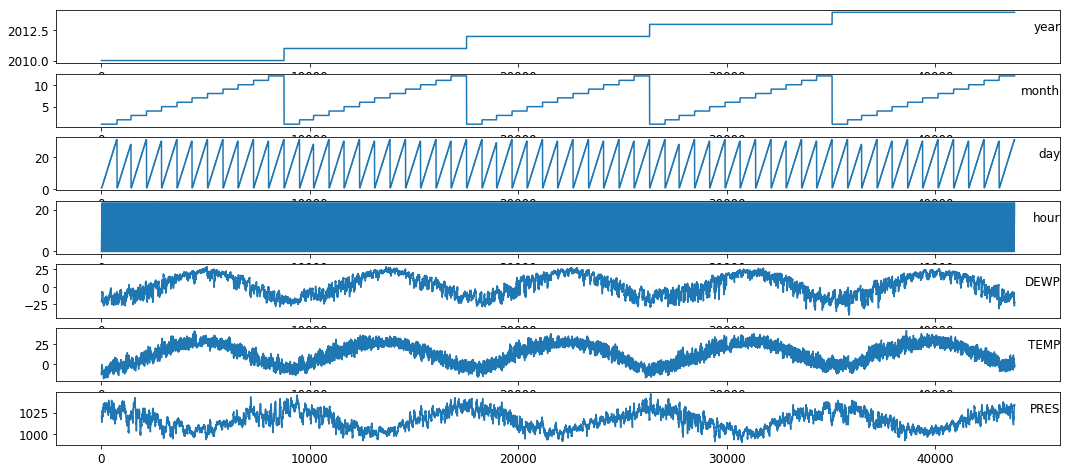

In [71]:
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure(figsize=(18,8))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [72]:
dataset

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
No,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0
6,2010,1,1,5,NaN,-19,-10.0,1017.0,16.10,0,0
7,2010,1,1,6,NaN,-19,-9.0,1017.0,19.23,0,0
8,2010,1,1,7,NaN,-19,-9.0,1017.0,21.02,0,0
9,2010,1,1,8,NaN,-19,-9.0,1017.0,24.15,0,0


### Split the data

In [73]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 14) (8760,) (35063, 1, 14) (35063,)


In [74]:
train.shape

(8760, 15)

## LSTM MODEL

In [76]:

# design network
modelLSTM = Sequential()
modelLSTM.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
modelLSTM.add(Dense(1))
modelLSTM.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
# fit network
historyLSTM = modelLSTM.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)



Train on 8760 samples, validate on 35063 samples
Epoch 1/50
 - 2s - loss: 0.0145 - acc: 0.9493 - val_loss: 0.0113 - val_acc: 0.9611
Epoch 2/50
 - 1s - loss: 0.0129 - acc: 0.9493 - val_loss: 0.0119 - val_acc: 0.9611
Epoch 3/50
 - 1s - loss: 0.0100 - acc: 0.9493 - val_loss: 0.0259 - val_acc: 0.9611
Epoch 4/50
 - 1s - loss: 0.0113 - acc: 0.9493 - val_loss: 0.0223 - val_acc: 0.9611
Epoch 5/50
 - 1s - loss: 0.0104 - acc: 0.9493 - val_loss: 0.0196 - val_acc: 0.9611
Epoch 6/50
 - 1s - loss: 0.0105 - acc: 0.9493 - val_loss: 0.0163 - val_acc: 0.9611
Epoch 7/50
 - 1s - loss: 0.0109 - acc: 0.9493 - val_loss: 0.0158 - val_acc: 0.9611
Epoch 8/50
 - 1s - loss: 0.0099 - acc: 0.9493 - val_loss: 0.0163 - val_acc: 0.9611
Epoch 9/50
 - 1s - loss: 0.0106 - acc: 0.9493 - val_loss: 0.0239 - val_acc: 0.9611
Epoch 10/50
 - 1s - loss: 0.0114 - acc: 0.9493 - val_loss: 0.0219 - val_acc: 0.9611
Epoch 11/50
 - 1s - loss: 0.0110 - acc: 0.9493 - val_loss: 0.0139 - val_acc: 0.9611
Epoch 12/50
 - 1s - loss: 0.0107 - a

## Visualization for results:

## Evaluation of LSTM

Text(0.5, 1.0, 'Loss Curves')

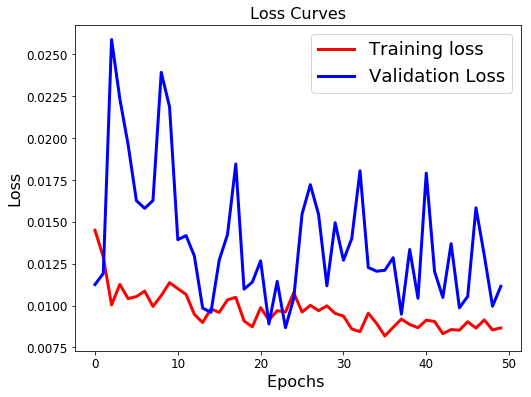

In [77]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(historyLSTM.history['loss'],'r',linewidth=3.0)
plt.plot(historyLSTM.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5, 1.0, 'Accuracy Curves')

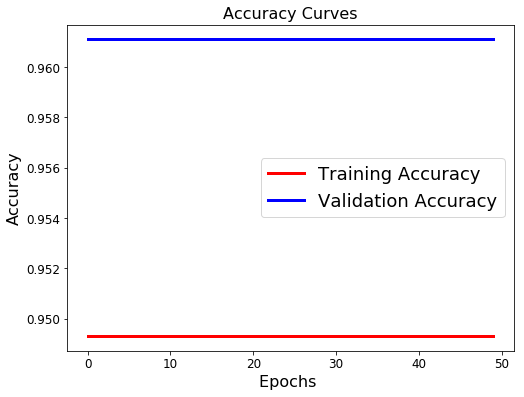

In [78]:
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(historyLSTM.history['acc'],'r',linewidth=3.0)
plt.plot(historyLSTM.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)